In [7]:
import pandas as pd  # Biblioteca para manipulação de dados
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import numpy as np  # Biblioteca para cálculo numérico
import random  # Biblioteca para gerar números aleatórios

In [8]:
#Solicita ao usuário o número de voltas
voltas = int(input('Insira o numero de voltas'))

#Inicialização das listas para armazenar dados de cada volta
lista_tempo = []
lista_vmax = []
lista_vmin = []
lista_vmedia = []
lista_pos = []
lista_media_batimentos = []

soma_batimentos = 0  #Variável para armazenar a soma dos batimentos (não utilizada posteriormente)

#Loop para coletar dados de cada volta
for i in range(voltas):
    # Coleta de tempo, velocidade máxima, mínima, posição e gera batimentos aleatórios
    tempo = float(int(input(f'Insira o tempo da {i+1}ª volta (segundos)')))
    lista_tempo.append(tempo)  # Armazena o tempo da volta
    v_max = float(int(input(f'Insira a velocidade maxima da {i+1}ª volta (km/h)')))
    lista_vmax.append(v_max)  # Armazena a velocidade máxima da volta
    v_min = float(int(input(f'Insira a velocidade minima {i+1}ª volta (km/h)')))
    lista_vmin.append(v_min)  # Armazena a velocidade mínima da volta
    posicao = (input('Insira a posicao do carro ao finalizar a volta'))
    lista_pos.append(posicao)  # Armazena a posição final da volta
    media_batimentos = random.randint(90, 100)  # Gera um valor aleatório para os batimentos (90 a 100)

    #Calcula e armazena a velocidade média da volta
    lista_vmedia.append((v_max + v_min) / 2)
    lista_media_batimentos.append(media_batimentos)  # Armazena a média de batimentos

#Criação do DataFrame com todos os dados coletados
df = pd.DataFrame({
    'Volta': list(range(1, voltas + 1)),  # Coluna com o número das voltas
    'Velocidade Maxima (km/h)': lista_vmax,  # Coluna com a velocidade máxima
    'Velocidade Minima (km/h)': lista_vmin,  # Coluna com a velocidade mínima
    'Velocidade Media (km/h)': lista_vmedia,  # Coluna com a velocidade média
    'Média de batimentos': lista_media_batimentos,  # Coluna com a média de batimentos
    'Tempo (s)': lista_tempo,  # Coluna com o tempo da volta
    'Posição': lista_pos  # Coluna com a posição final na volta
})

df  #Exibe o DataFrame

,Volta,Velocidade Maxima (km/h),Velocidade Minima (km/h),Velocidade Media (km/h),Média de batimentos,Tempo (s),Posição
0,1,270.0,90.0,180.0,93,72.0,3
1,2,260.0,85.0,172.5,91,75.0,4
2,3,250.0,80.0,165.0,100,78.0,5
3,4,290.0,95.0,192.5,93,65.0,2
4,5,310.0,100.0,205.0,97,60.0,1


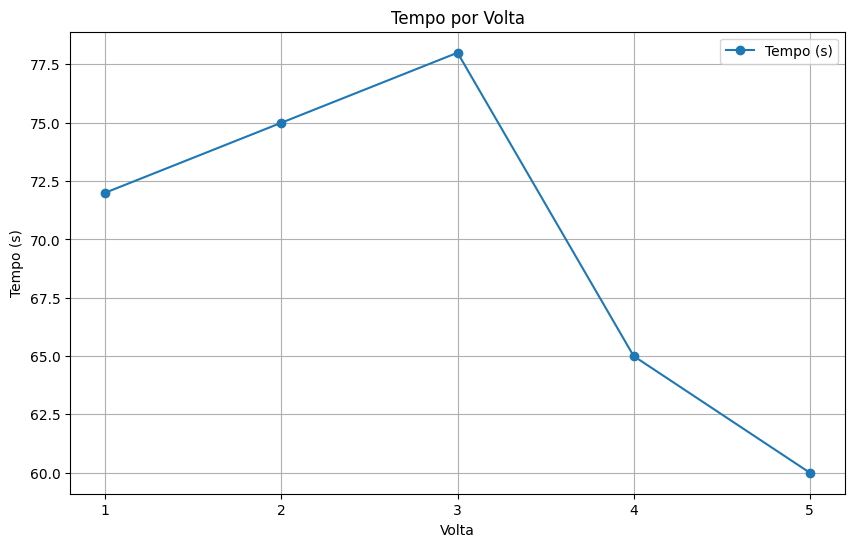

In [9]:
# Gráfico de tempo por volta
df.plot(x='Volta', y='Tempo (s)', kind='line', marker='o', figsize=(10, 6), title='Tempo por Volta')
plt.ylabel('Tempo (s)')  # Rótulo do eixo Y
plt.xticks(ticks=range(1, voltas + 1))  # Garante que os valores inteiros apareçam no eixo X
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()

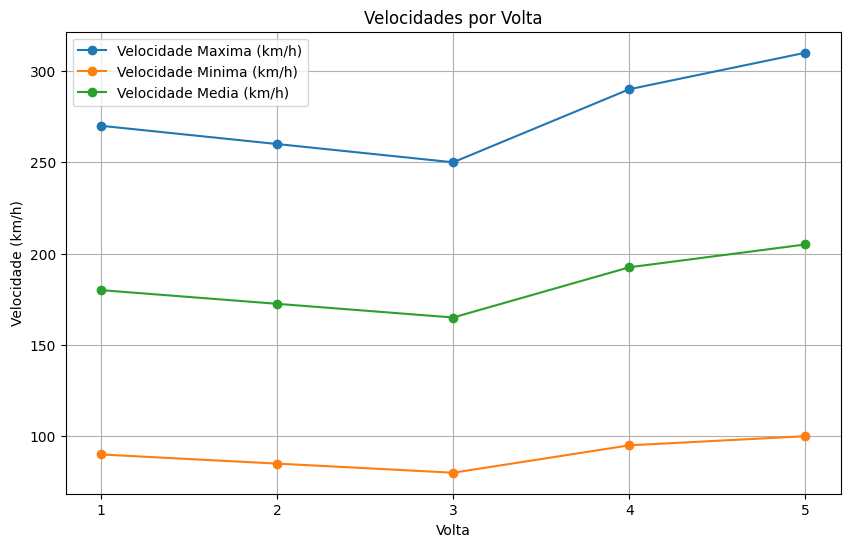

In [10]:
# Gráfico de velocidades por volta
df.plot(x='Volta', y=['Velocidade Maxima (km/h)', 'Velocidade Minima (km/h)', 'Velocidade Media (km/h)'], 
        kind='line', marker='o', figsize=(10, 6), title='Velocidades por Volta')
plt.ylabel('Velocidade (km/h)')  # Rótulo do eixo Y
plt.xticks(ticks=range(1, voltas + 1))  # Garante que os valores inteiros apareçam no eixo X
plt.grid(True)
plt.show()

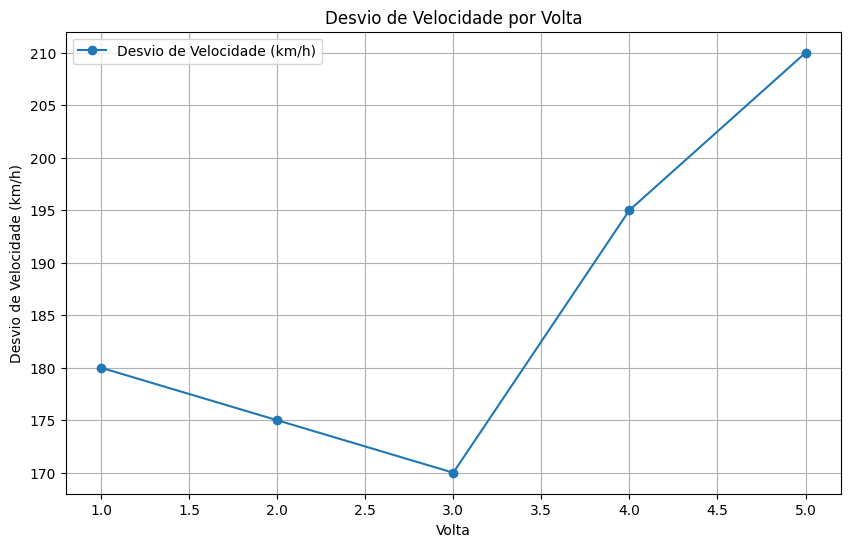

In [11]:
# Cálculo do desvio de velocidade por volta e criação de gráfico
df['Desvio de Velocidade (km/h)'] = df['Velocidade Maxima (km/h)'] - df['Velocidade Minima (km/h)']  # Calcula o desvio
df.plot(x='Volta', y='Desvio de Velocidade (km/h)', kind='line', marker='o', figsize=(10, 6), title='Desvio de Velocidade por Volta')
plt.ylabel('Desvio de Velocidade (km/h)')
plt.grid(True)
plt.show()

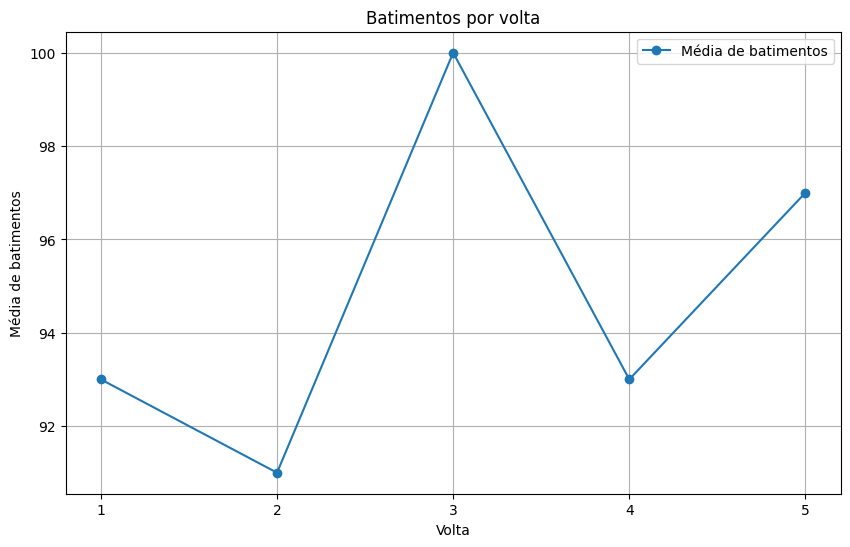

In [12]:
# Gráfico de média de batimentos por volta
df.plot(x="Volta", y="Média de batimentos", kind='line', marker='o', figsize=(10, 6), title="Batimentos por volta")
plt.ylabel("Média de batimentos")
plt.xticks(ticks=range(1, voltas + 1))
plt.grid(True)
plt.show()

In [13]:
def analisar_tempo_volta(df):
    """
    Analisa o tempo por volta e gera recomendações.
    """
    tempo_inicial = df['Tempo (s)'].iloc[0]  # Tempo da primeira volta
    tempo_final = df['Tempo (s)'].iloc[-1]  # Tempo da última volta
    tendencia_tempo = np.polyfit(df['Volta'], df['Tempo (s)'], 1)  # Calcula a tendência linear do tempo

    # Se a tendência for de aumento (tempo aumentando)
    if tendencia_tempo[0] > 0:
        print("Análise do Tempo por Volta:")
        print("O tempo das voltas está aumentando, indicando possível desgaste dos pneus, cansaço ou estratégia inadequada.")
        print("Recomendação: Tente manter um ritmo mais constante ao longo da corrida. Verifique a estratégia de uso dos pneus e ajuste a abordagem nas curvas.")

    # Se o tempo inicial for maior que o tempo final
    if tempo_inicial > tempo_final:
        print("Recomendação: Cuidado com a pressão nas primeiras voltas. Tente não forçar tanto no início para manter a consistência.")

# Função para analisar as velocidades por volta
def analisar_velocidades_volta(df):
    """
    Analisa as velocidades máxima, mínima e média e gera recomendações.
    """
    max_vel_diff = df['Velocidade Maxima (km/h)'].max() - df['Velocidade Minima (km/h)'].min()  # Diferença entre velocidade máxima e mínima
    tendencia_media = np.polyfit(df['Volta'], df['Velocidade Media (km/h)'], 1)  # Tendência linear da velocidade média

    # Se a velocidade mínima for muito baixa
    if df['Velocidade Minima (km/h)'].min() < 60:
        print("\nAnálise de Velocidades por Volta:")
        print("A velocidade mínima está muito baixa em algumas voltas, indicando que o piloto está reduzindo demais nas curvas.")
        print("Recomendação: Tente manter uma velocidade mínima mais alta nas curvas, melhorando as técnicas de frenagem e aceleração nas saídas.")
    
    # Se a diferença entre a velocidade máxima e mínima for muito grande
    if max_vel_diff > 80:
        print("A diferença entre a velocidade máxima e mínima é muito grande, sugerindo inconsistência na pilotagem.")
        print("Recomendação: Trabalhe na consistência, tentando reduzir a diferença de velocidade entre as retas e as curvas.")

    # Se a velocidade média estiver caindo
    if tendencia_media[0] < 0:
        print("A velocidade média está diminuindo ao longo das voltas, o que pode indicar desgaste do piloto ou do carro.")
        print("Recomendação: Tente revisar a estratégia de corrida, otimizando a aceleração e desaceleração, e verifique possíveis problemas mecânicos.")

# Função para analisar a consistência nas curvas (velocidade mínima)
def analisar_consistencia_curvas(df):
    """
    Analisa a consistência da velocidade mínima nas curvas.
    """
    desvio_min_vel = df['Velocidade Minima (km/h)'].std()  # Calcula o desvio padrão da velocidade mínima

    # Se o desvio for muito alto
    if desvio_min_vel > 8:
        print("\nAnálise de Consistência nas Curvas:")
        print(f"A variação na velocidade mínima é alta (desvio padrão de {desvio_min_vel:.2f} km/h).")
        print("Recomendação: O piloto deve trabalhar para manter uma velocidade mais consistente nas curvas, melhorando as técnicas de frenagem e aceleração.")

# Chamando as funções de análise com o DataFramea9
analisar_tempo_volta(df)
analisar_velocidades_volta(df)
analisar_consistencia_curvas(df)

Recomendação: Cuidado com a pressão nas primeiras voltas. Tente não forçar tanto no início para manter a consistência.
A diferença entre a velocidade máxima e mínima é muito grande, sugerindo inconsistência na pilotagem.
Recomendação: Trabalhe na consistência, tentando reduzir a diferença de velocidade entre as retas e as curvas.


USAR IA PARA ANALISE PREDITIVA DE DADOS (PREVER RESULTADOS)

In [14]:
# Salvando o DataFrame para um arquivo CSV
df.to_csv('dados_corrida.csv', index=False)  # Salva o DataFrame em um arquivo CSV sem o índice.

# Função para salvar gráficos em arquivos SVG
def salvar_grafico(df, x_col, y_col, titulo, ylabel, filename):
    """
    Função que gera e salva um gráfico de linhas baseado em colunas específicas do DataFrame.
    
    Parâmetros:
    - df: DataFrame com os dados da corrida.
    - x_col: Nome da coluna para o eixo X.
    - y_col: Nome(s) da(s) coluna(s) para o eixo Y.
    - titulo: Título do gráfico.
    - ylabel: Rótulo do eixo Y.
    - filename: Nome do arquivo SVG a ser salvo.
    """
    # Gera o gráfico com os dados especificados
    df.plot(x=x_col, y=y_col, kind='line', marker='o', figsize=(10, 6), title=titulo)
    
    # Configurações adicionais do gráfico
    plt.ylabel(ylabel)  # Rótulo do eixo Y
    plt.xticks(ticks=range(1, voltas + 1))  # Define o eixo X para exibir o número de voltas
    plt.grid(True)  # Ativa a grade no gráfico
    
    # Salva o gráfico em formato SVG
    plt.savefig(f'{filename}.svg', format='svg')
    
    # Fecha o gráfico para liberar memória
    plt.close()

# Chamada da função para salvar os gráficos em SVG
# Gráfico 1: Tempo por volta
salvar_grafico(df, 'Volta', 'Tempo (s)', 'Tempo por Volta', 'Tempo (s)', 'tempo_volta')

# Gráfico 2: Velocidade máxima, mínima e média por volta
salvar_grafico(df, 'Volta', ['Velocidade Maxima (km/h)', 'Velocidade Minima (km/h)', 'Velocidade Media (km/h)'], 
               'Velocidades por Volta', 'Velocidade (km/h)', 'velocidade_volta')

# Cálculo do desvio de velocidade (diferença entre velocidade máxima e mínima)
df['Desvio de Velocidade (km/h)'] = df['Velocidade Maxima (km/h)'] - df['Velocidade Minima (km/h)']

# Gráfico 3: Desvio de velocidade por volta
salvar_grafico(df, 'Volta', 'Desvio de Velocidade (km/h)', 'Desvio de Velocidade por Volta', 
               'Desvio de Velocidade (km/h)', 'desvio_volta')

# Gráfico 4: Batimentos cardíacos por volta
salvar_grafico(df, 'Volta', 'Média de batimentos', 'Batimentos por Volta', 
               'Média de batimentos', 'batimentos_volta')

# Mensagem final informando que os arquivos foram salvos com sucesso
print("Os arquivos CSV e SVG foram salvos com sucesso.")

Os arquivos CSV e SVG foram salvos com sucesso.
